<a href="https://colab.research.google.com/github/Enamul-Hoq/my_Deep_Learning/blob/main/CIFAR_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train.shape:",x_train.shape)

x_train.shape: (60000, 28, 28)


In [11]:
#As the data is only 2D than is why for CNN we need to make it 3D channels
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape:",x_train.shape)

x_train.shape: (60000, 28, 28, 1)


In [12]:
# K is the number of classes|| number of unique elements
K = len(set(y_train))
print("K is the number of classes = ",K)

K is the number of classes =  10


In [16]:
# Building the CNN model. This model is for the single input and a single output 
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), padding= 'same', activation = 'relu')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), padding= 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), padding= 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), padding= 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), padding= 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), padding= 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)
model = Model(i,x)

In [17]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs= 50)

Epoch 1/50
1875/1875 [==============================] - 29s 8ms/step - loss: 0.4088 - accuracy: 0.8564 - val_loss: 0.3094 - val_accuracy: 0.8855
Epoch 2/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2640 - accuracy: 0.9043 - val_loss: 0.2659 - val_accuracy: 0.9023
Epoch 3/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2241 - accuracy: 0.9181 - val_loss: 0.2492 - val_accuracy: 0.9071
Epoch 4/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1998 - accuracy: 0.9278 - val_loss: 0.2335 - val_accuracy: 0.9160
Epoch 5/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1766 - accuracy: 0.9350 - val_loss: 0.2407 - val_accuracy: 0.9172
Epoch 6/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1567 - accuracy: 0.9423 - val_loss: 0.2122 - val_accuracy: 0.9255
Epoch 7/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1373 - accuracy: 0.9490 - val_loss: 0.2204 - val_ac

In [18]:
# Fit the data with Augmentation 
# If I run this after calling the previous model.fit(), it will continue training where it left off

batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range = 0.1, horizontal_flip = True)
train_generator = data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch = x_train.shape[0]//batch_size
r = model.fit_generator(train_generator,validation_data = (x_test,y_test), steps_per_epoch = steps_per_epoch, epochs= 50)

Epoch 1/50


<ipython-input-18-b331f6e087c0>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator,validation_data = (x_test,y_test), steps_per_epoch = steps_per_epoch, epochs= 50)


1875/1875 [==============================] - 31s 16ms/step - loss: 0.3837 - accuracy: 0.8710 - val_loss: 0.2069 - val_accuracy: 0.9281
Epoch 2/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2770 - accuracy: 0.9011 - val_loss: 0.2056 - val_accuracy: 0.9284
Epoch 3/50
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2454 - accuracy: 0.9124 - val_loss: 0.1992 - val_accuracy: 0.9323
Epoch 4/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2268 - accuracy: 0.9180 - val_loss: 0.1878 - val_accuracy: 0.9332
Epoch 5/50
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2157 - accuracy: 0.9214 - val_loss: 0.1954 - val_accuracy: 0.9284
Epoch 6/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2100 - accuracy: 0.9250 - val_loss: 0.1912 - val_accuracy: 0.9345
Epoch 7/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2021 - accuracy: 0.9272 - val_loss: 0.1953 - val_accura

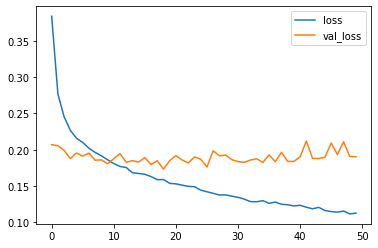

In [19]:
#Plotting the loss per iteration 
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

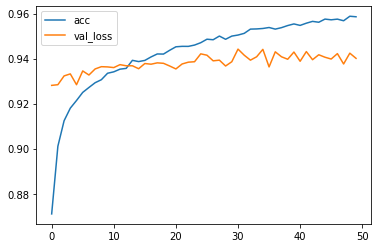

In [20]:
# Plotting accuracy per iteration 
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_loss')
plt.legend()

313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[849   2  12  15   1   0 117   0   4   0]
 [  0 994   0   4   0   0   1   0   1   0]
 [ 15   1 916   9  21   0  38   0   0   0]
 [  4   2   6 952  10   0  25   0   1   0]
 [  1   0  19  29 919   0  32   0   0   0]
 [  0   0   0   0   0 984   0   7   1   8]
 [ 55   1  26  20  37   0 859   0   2   0]
 [  0   0   0   0   0   9   0 972   0  19]
 [  1   1   0   3   1   1   3   0 990   0]
 [  0   0   0   0   0   4   0  29   1 966]]


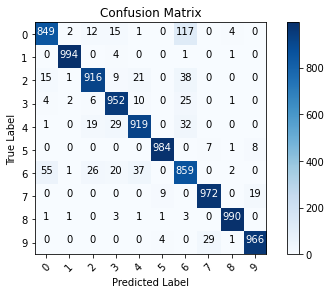

In [21]:
from prompt_toolkit.layout import HorizontalAlign
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
  
  if normalize:
    cm = cm.astype('float')/ cm.sum(axis = 1)[:, np.newaxis]
    print("Normalized confusion matix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap= cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j],fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i,j]> thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel("Predicted Label")
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm, list(range(10)))

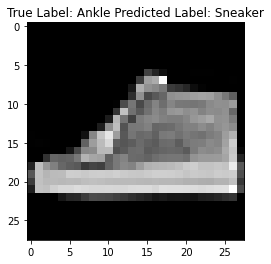

In [26]:
# From the confusion matrix we observe that the model is pretty much confused with 
# to differentiate between [0]= 'T-shirt/top and [6]='shirt' which is 123 and make sense
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title("True Label: %s Predicted Label: %s" %(labels[y_test[i]], labels[p_test[i]]));


In [30]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0     